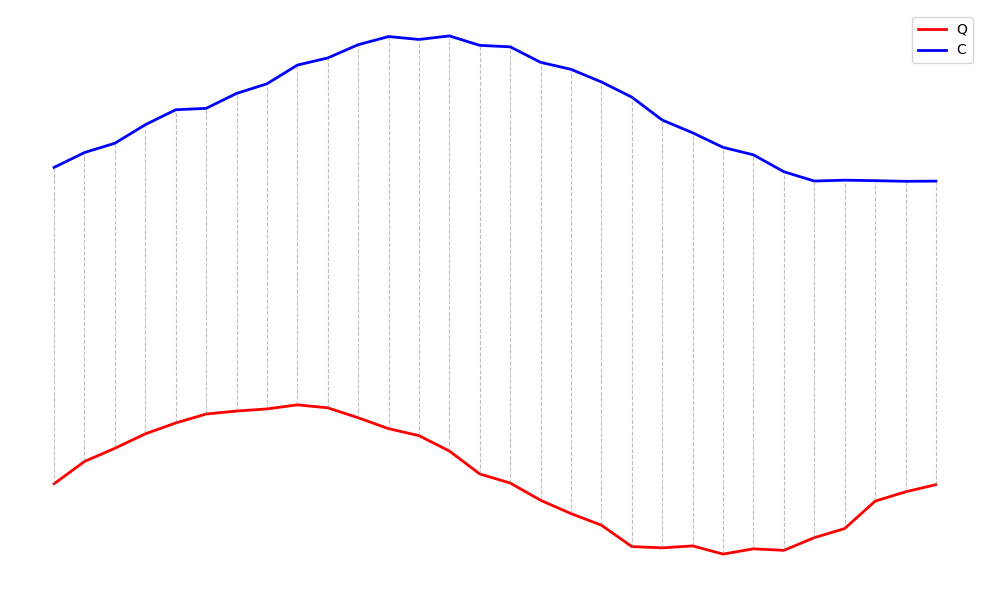

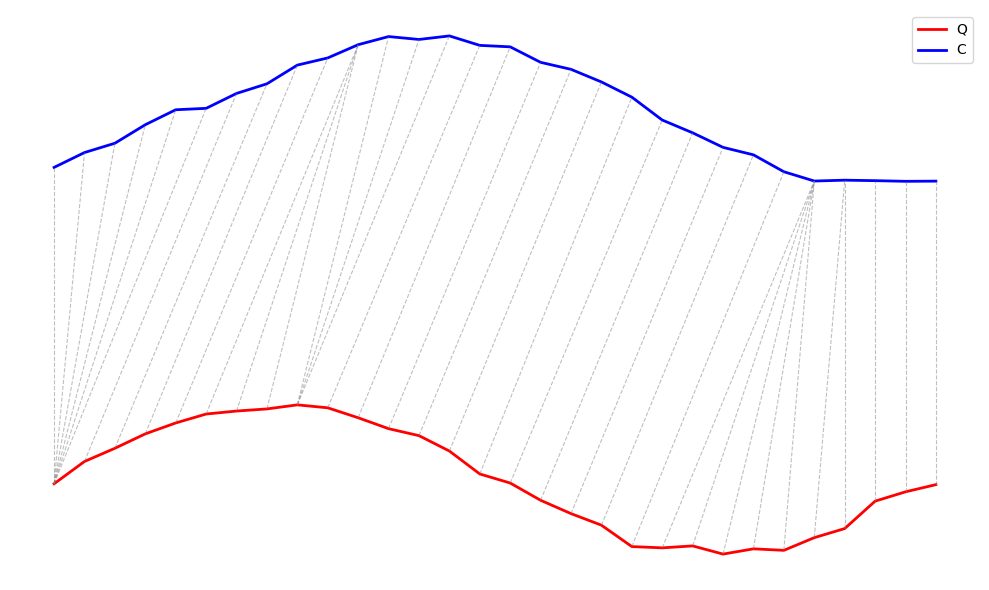

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from aeon.distances import alignment_path

def plot_alignment(x, y, title, alignment_type="1-to-1"):
    plt.figure(figsize=(10, 6))
    
    # Offset y for visual clarity
    y_shifted = y + 5  
    
    plt.plot(x, label="Q", color="red", linewidth=2)
    plt.plot(y_shifted, label="C", color="blue", linewidth=2)
    
    if alignment_type == "dtw":
        path, _ = alignment_path(x, y, "dtw")
    else:
        # Euclidean is strictly 1-to-1
        path = [(i, i) for i in range(len(x))]

    lines = []
    for i, j in path:
        lines.append([(i, x[i]), (j, y_shifted[j])])
    
    lc = LineCollection(lines, colors='gray', alpha=0.5, linewidth=0.8, linestyle='--')
    plt.gca().add_collection(lc)

    plt.axis('off')
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"alignment_{alignment_type}.pdf")
    plt.show()

t = np.linspace(0, 2 * np.pi, 30)
x = np.sin(t) 
y = np.roll(x, 5) 
y[10:15] = y[10:15] 
x += np.random.normal(0, 0.05, size=len(x))
y += np.random.normal(0, 0.05, size=len(y))

plot_alignment(x, y, "Euclidean Distance: Rigid 1-to-1 Alignment", alignment_type="ed")
plot_alignment(x, y, "Dynamic Time Warping (DTW): Flexible 1-to-Many Alignment", alignment_type="dtw")

In [2]:
import datetime

print(f"This notebook was last run end-to-end on: {datetime.datetime.now()}\n")
###
###
###

This notebook was last run end-to-end on: 2026-01-09 23:26:31.094595

